In [92]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
    

In [93]:
%%time
#loading the data
finacc=pd.read_excel("finaccess.xls")
finacc.head()

Wall time: 3.86 s


,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,0,2,0,0,0,2,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,3,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,2,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,3,7,0,0,0,0,0,0,0,1


In [94]:
finacc.shape

(8669, 72)

In [95]:
pd.set_option('display.max_columns',None)
finacc.head(20)

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Light_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,0,2,0,0,0,2,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,3,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,2,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,3,7,0,0,0,0,0,0,0,1
5,0,6,0,45,8,3,8,0,0,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,8,4,1,1,1,1,1,1,0
6,0,2,0,80,1,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,8,4,0,0,0,0,0,1,0
7,0,1,0,57,1,1,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,3,4,4,0,0,0,0,0,1,0
8,0,4,0,40,1,3,1,0,2,2,2,1,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4,0,0,1,0,1,1,0
9,0,1,1,44,1,3,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,11,4,0,0,1,0,0,1,0


In [96]:
finacc.describe()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
count,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.00000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000,8669.000000
mean,0.416542,3.974276,0.577460,39.293690,2.493136,2.025955,3.050179,0.040028,0.316530,0.855116,0.216173,0.606990,0.181105,0.115930,0.552082,1.489907,0.423694,0.085477,0.184566,0.09632,0.024224,0.013035,0.196332,0.031376,0.031953,0.250202,0.061714,0.714731,0.149498,0.024224,0.021917,0.008882,0.001730,0.032184,0.025378,0.125505,0.378129,0.005422,0.358173,0.007844,0.056985,0.002538,0.002192,0.033914,0.002422,0.004499,0.002422,0.508825,0.036682,0.016265,0.010266,0.013381,0.209251,0.018687,0.001038,0.001615,0.005537,0.002538,0.817741,0.501211,0.942439,1.782212,4.134964,2.951898,0.533049,0.561656,0.523474,0.578383,0.714154,0.579306,1.112008
std,0.493014,2.321904,0.493992,17.103637,2.015023,1.291463,3.168386,0.258477,0.695878,0.966085,0.603108,0.891301,0.544688,0.436098,0.858985,0.853098,0.795898,0.371402,0.546700,0.40283,0.200631,0.147869,0.557890,0.225678,0.227380,0.608196,0.307194,0.901694,0.506106,0.201778,0.180318,0.112813,0.044252,0.245406,0.191060,0.471310,0.760141,0.086426,0.749317,0.121266,0.322915,0.066163,0.057800,0.253728,0.068733,0.087803,0.059754,0.844823,0.264918,0.175411,0.137587,0.160916,0.589324,0.181954,0.044274,0.054744,0.093473,0.064395,0.907846,0.500027,0.905317,2.434723,3.173460,1.435385,0.498935,0.496213,0.499477,0.493846,0.451843,0.519212,1.532235
min,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [97]:
#identify missing values
finacc.isnull().sum()

Residence         0
Household Size    0
Resp              0
Age               0
Education         0
                 ..
Banana            0
Towels            0
Flask             0
Own_Land          0
House_0ship       0
Length: 72, dtype: int64

In [98]:
finacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8669 entries, 0 to 8668
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Residence       8669 non-null   int64 
 1   Household Size  8669 non-null   int64 
 2   Resp            8669 non-null   int64 
 3   Age             8669 non-null   int64 
 4   Education       8669 non-null   int64 
 5   Marital         8669 non-null   int64 
 6   Income          8669 non-null   int64 
 7   Save_Micro      8669 non-null   int64 
 8   Sav_Mobank      8669 non-null   int64 
 9   Sav_Mob         8669 non-null   int64 
 10  Sav_Coop        8669 non-null   int64 
 11  Save_Chama      8669 non-null   int64 
 12  Sav_Friends     8669 non-null   int64 
 13  Sav_FamKeep     8669 non-null   int64 
 14  Sav_Secret      8669 non-null   int64 
 15  Mob_M1y         8669 non-null   int64 
 16  Mob_Bank        8669 non-null   int64 
 17  Loan_Bank       8669 non-null   int64 
 18  Loan_Mob

In [99]:
finacc["Light_Type"]

0       3
1       0
2       3
3       2
4       3
       ..
8664    1
8665    1
8666    1
8667    2
8668    2
Name: Light_Type, Length: 8669, dtype: object

In [100]:
#Dropping Light_Type column
finacc1=finacc.drop('Light_Type', axis=1)
finacc1.head()

,Residence,Household Size,Resp,Age,Education,Marital,Income,Save_Micro,Sav_Mobank,Sav_Mob,Sav_Coop,Save_Chama,Sav_Friends,Sav_FamKeep,Sav_Secret,Mob_M1y,Mob_Bank,Loan_Bank,Loan_Mobank,Loan_Coop,Loan_Micro,Loan_Shy,Loan_Chama,Loan_Gov,Loan_Emp,Loan_Friend,Loan_Shop,Credit_Shop,Digi_Loan,Loan_Agri,Hire_Purchase,Loan_House,Loan_Gov.1,Curr_Acc,Post_Acc,Inv_Acc,Everday_Acc,Bank_OD,Atm_Card,Credit_Card,Shares,T_Bills,Mutual_Funds,Car_Ins,Home_Ins,Crop_Ins,Live_Ins,NHIF,Med-Ins,Life_Ins,Edu_Ins,Other_Ins,NSSF,6,Mbao_6,Ind_6,9_6,Crypto,Dwelling_ type,Floor_Type,Wall_Type,Fuel_Type,Main_Water,Toilet_Type,Bread,Fish,Banana,Towels,Flask,Own_Land,House_0ship
0,0,6,0,49,2,3,0,0,2,2,0,2,0,0,0,2,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,4,1,0,0,0,0,0,5
1,0,7,0,43,2,3,1,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,7,3,0,0,0,0,0,0,1
2,0,5,0,55,1,3,0,0,0,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,7,4,1,0,1,1,0,1,0
3,0,12,1,55,0,3,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,1,4,1,1,1,0,1,1,0
4,0,4,0,63,0,3,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,7,0,0,0,0,0,0,0,1


In [101]:
finacc1.shape

(8669, 71)

In [26]:
finacc.columns

Index([     'Residence', 'Household Size',           'Resp',            'Age',
            'Education',        'Marital',         'Income',     'Save_Micro',
           'Sav_Mobank',        'Sav_Mob',       'Sav_Coop',     'Save_Chama',
          'Sav_Friends',    'Sav_FamKeep',     'Sav_Secret',        'Mob_M1y',
             'Mob_Bank',      'Loan_Bank',    'Loan_Mobank',      'Loan_Coop',
           'Loan_Micro',       'Loan_Shy',     'Loan_Chama',       'Loan_Gov',
             'Loan_Emp',    'Loan_Friend',      'Loan_Shop',    'Credit_Shop',
            'Digi_Loan',      'Loan_Agri',  'Hire_Purchase',     'Loan_House',
           'Loan_Gov.1',       'Curr_Acc',       'Post_Acc',        'Inv_Acc',
          'Everday_Acc',        'Bank_OD',       'Atm_Card',    'Credit_Card',
               'Shares',        'T_Bills',   'Mutual_Funds',        'Car_Ins',
             'Home_Ins',       'Crop_Ins',       'Live_Ins',           'NHIF',
              'Med-Ins',       'Life_Ins',        'E

#### Using KMeans Algorithm

In [29]:
from sklearn.cluster import KMeans

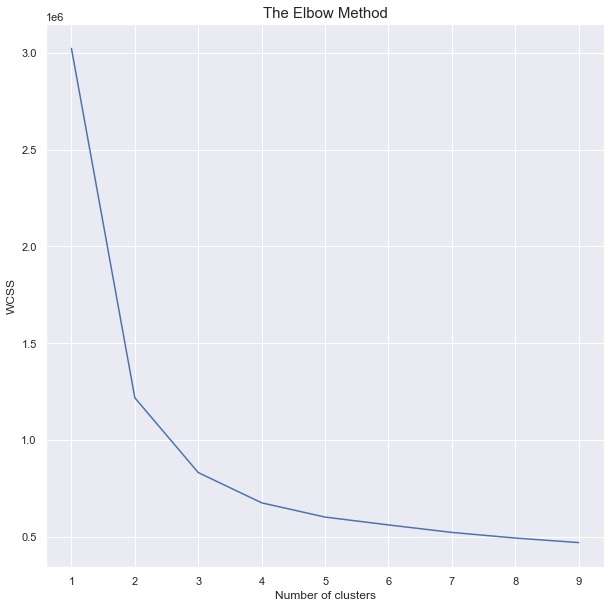

In [35]:
#Implementing the Elbow method to determine the number of clusters, this can be done using WCSS(sum of square of distances of datapoints)
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters = i, init = "k-means++")
    km.fit(finacc1)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#####  From the  Elbow Method Figure above, it is evident that there is no particular elbow for this dataset.

## Converting the Dataset from multidimensions to 2 dimensions

In [28]:
#Using Principal Component Analysis(PCA)-unsupervised dimensionality reduction technique.
from sklearn.decomposition import PCA

In [102]:
#scale the date to range between 0 and 1 befor using PCA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
rescaled_data=scaler.fit_transform(finacc1)

In [103]:
rescaled_data

array([[0.   , 0.25 , 0.   , ..., 0.   , 0.   , 0.625],
       [0.   , 0.3  , 0.   , ..., 0.   , 0.   , 0.125],
       [0.   , 0.2  , 0.   , ..., 0.   , 0.125, 0.   ],
       ...,
       [1.   , 0.   , 0.   , ..., 1.   , 0.   , 0.375],
       [0.   , 0.15 , 1.   , ..., 1.   , 0.125, 0.   ],
       [1.   , 0.1  , 1.   , ..., 1.   , 0.   , 0.375]])

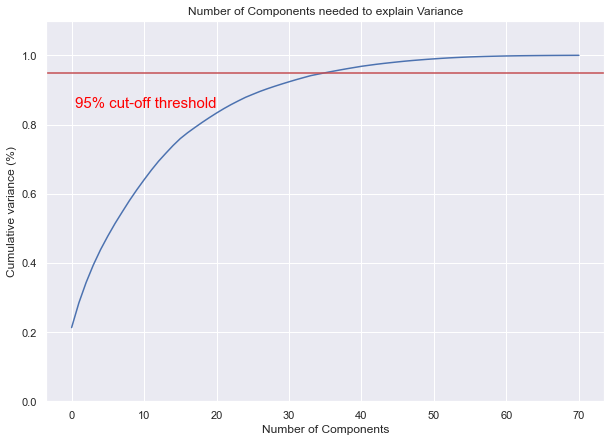

In [111]:
pca=PCA().fit(rescaled_data)
plt.rcParams['figure.figsize']=(10,7)

plt.ylim(0.0,1.1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Components needed to explain Variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=15)

plt.show()

In [113]:
#Typically we want the explained variance to be between (95-99%)
pca=PCA(n_components=35)

In [114]:
pca.fit(rescaled_data)

PCA(copy=True, iterated_power='auto', n_components=35, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [116]:
data=pca.fit_transform(rescaled_data)

In [117]:
data.shape

(8669, 35)

In [118]:
data

array([[-0.02049811,  1.07459256,  0.85416688, ..., -0.09220851,
        -0.11631642, -0.07365039],
       [-1.51883658,  0.78904154,  0.69371411, ...,  0.06369751,
        -0.12710159,  0.04838451],
       [-0.54964371,  0.74778957,  0.01827965, ...,  0.01480238,
         0.14692184,  0.01457019],
       ...,
       [ 1.12309096, -0.08157866,  0.28925599, ...,  0.07475978,
        -0.05682328, -0.02613502],
       [-0.12384058, -0.4284189 , -0.8028801 , ...,  0.0354123 ,
        -0.15811125, -0.0556329 ],
       [ 1.4166867 ,  0.38299117, -1.00340566, ..., -0.00199743,
         0.1548191 ,  0.0200359 ]])

#### Elbow method after scaling the data

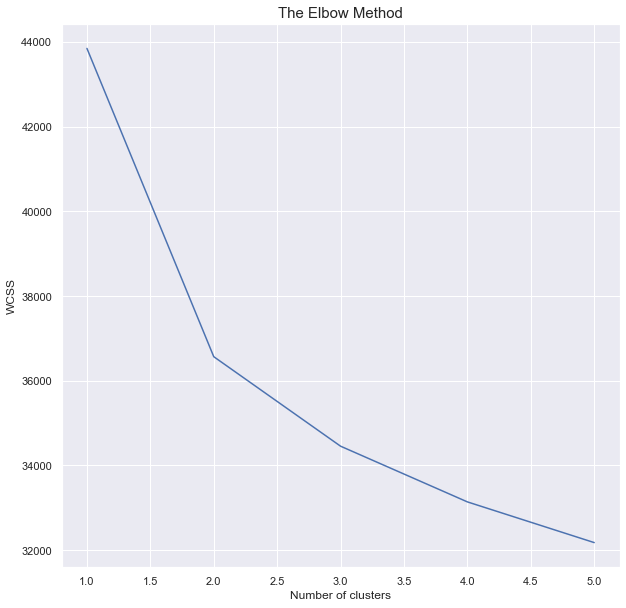

In [120]:
wcss=[]

for i in range(1,6):
    km=KMeans(n_clusters = i, init = "k-means++")
    km.fit(data)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(10,10))
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [123]:
#Training the models
#using n-clusters=2-from the elbow method figure above
km1=KMeans(n_clusters = 2, init = "k-means++")
label = km1.fit_predict(data)
print(label)

[0 0 0 ... 1 0 1]


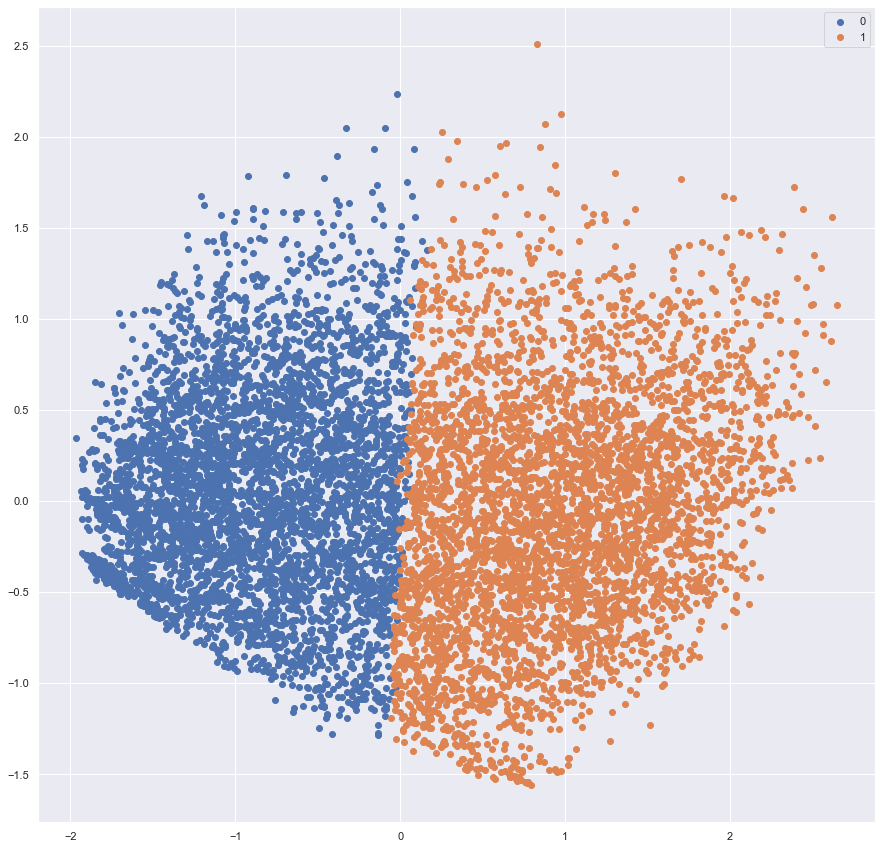

In [122]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)  
plt.legend()
plt.show()